In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# Protein Abundance

NRAS

In [3]:
gene = 'PIK3CA'
protList = ['NRAS']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for NRAS: 
Ttest_indResult(statistic=0.04497815052623363, pvalue=0.9642162480281973)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

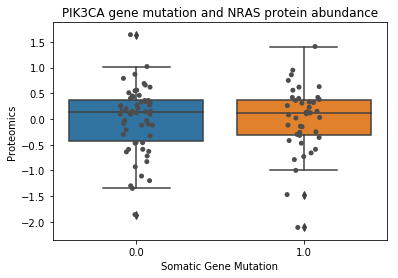

In [5]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

MRAS

In [7]:
gene = 'PIK3CA'
protList = ['MRAS']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for MRAS: 
Ttest_indResult(statistic=-0.673913401424868, pvalue=0.5023089469279987)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

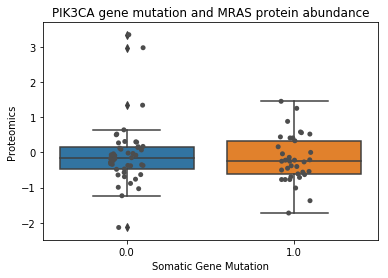

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

# Phosphorylation

In [12]:
phosProt = phos.filter(regex='RRAS')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)


0.016666666666666666
Results for RRAS2-S186
Ttest_indResult(statistic=-1.44289320793232, pvalue=0.1522392948363883)
Results for RRAS2-T190
Ttest_indResult(statistic=-1.3438002904738269, pvalue=0.18231780832582006)
